In [1]:
%load_ext autoreload
%autoreload 2 
import all_function_defs as f

In [ ]:
# All fluxes to excel

# path = 
# f.all_fluxes_to_excel(path, IFO_all_fluxes_bm)

# path = 
# f.all_fluxes_to_excel(path, IFO_all_fluxes_nm)

### BIOMASS MAXIMISATION

In [2]:
# Get all fluxes over five rates and make a df

model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml"
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

biomass_rxn_ID = "BIOMASS_RT"   
glc_ID = 'EX_glc__D_e'

IFO_all_fluxes_bm = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)
IFO_all_fluxes_bm

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003255,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007917,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.011818,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.016619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.022427,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
growth_rates = IFO_all_fluxes_bm[biomass_rxn_ID]
growth_rates


0    0.033713
1    0.081992
2    0.122398
3    0.172112
4    0.232267
Name: BIOMASS_RT, dtype: object

In [31]:
# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, IFO_all_fluxes_bm, exchange_metabolites)

intracellular_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, IFO_all_fluxes_bm, intracellular_metabolites)

phosphoketolase_ACL = ['XPK', 'ACITL']
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, IFO_all_fluxes_bm, phosphoketolase_ACL)

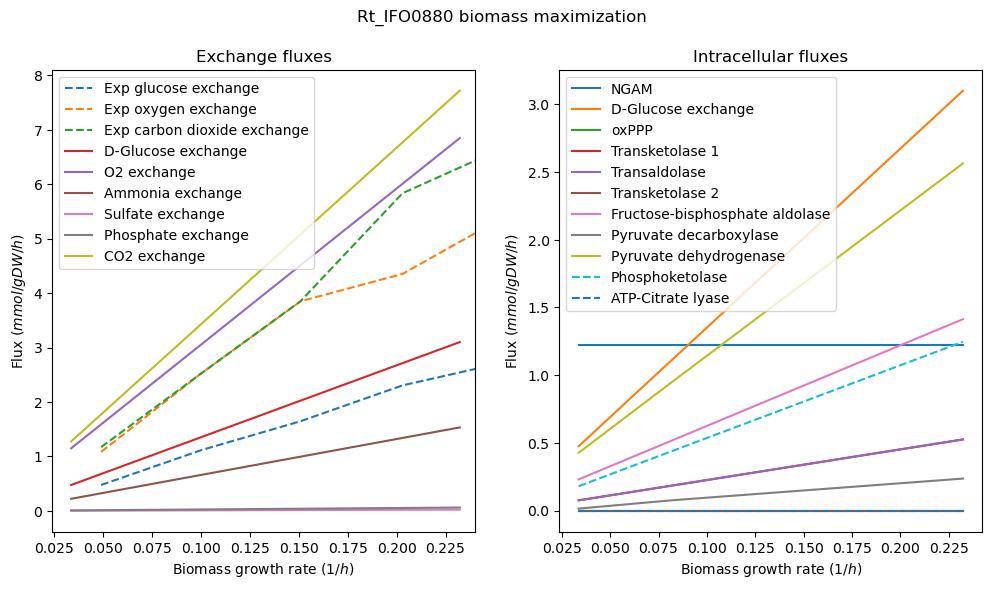

In [45]:
title = 'Rt_IFO0880 biomass maximization'
fig = f.plot_ex_intr_fluxes(IFO_all_fluxes_bm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max.png")

COFACTOR balances

In [49]:
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] # 
# Cofactor lists
nadphs = ['nadph_c', 'nadph_m', 'nadph_x', 'nadph_r']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r']
atps = ['atp_c', 'atp_m', 'atp_x', 'atp_r', 'atp_v', 'atp_n'] 
i1 = 0
i2 = 4

SUM produced: 0.6029655918070933, SUM consumed: -0.6029655918070933
SUM produced: 3.9747355750384545, SUM consumed: -3.9747355750384545


([<matplotlib.patches.Wedge at 0x1ec9ed20fe0>,
 [Text(0.17998805963084863, 1.0851747778078527, '89.5% Alcohol dehydrogenase (ethanol, NADP) (3.56)'),
  Text(-1.0697699478180616, 0.2561098567906791, '6.0% Aldehyde dehydrogenase  acetylaldehyde  NADP   mitochondrial (0.24)'),
  Text(-1.0972582528253059, 0.0776165356528968, '4.5% Other producing (0.18)'),
  Text(-1.0921942082848115, -0.13081212248531807, '7.6% Fatty acyl CoA synthase  n C80CoA   lumped reaction (-0.3)'),
  Text(-0.7827635614987012, -0.7728397031661025, '34.4% Glutamate dehydrogenase (NADP) (-1.37)'),
  Text(-0.09696697915127615, -1.0957177578894468, '10.4% Hydroxymethylglutaryl CoA reductase (-0.41)'),
  Text(0.1960976552274029, -1.0823796513304909, '6.7% Methylenetetrahydrofolate dehydrogenase (NADP) (-0.26)'),
  Text(0.8800107488575831, -0.6599856679467486, '41.0% Other consuming (-1.63)')])

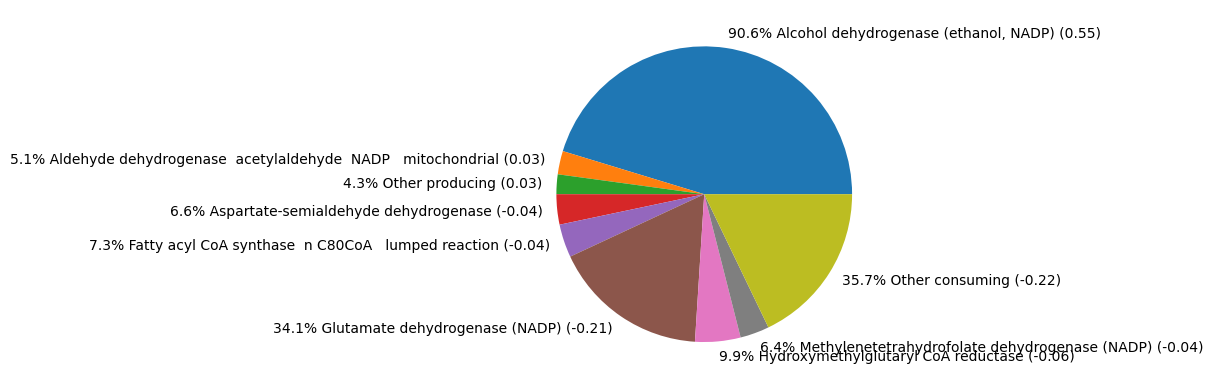

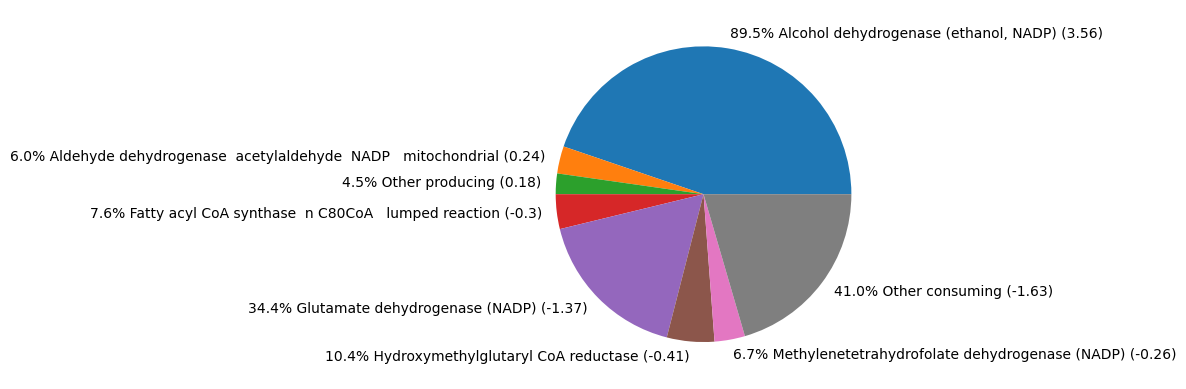

In [54]:
nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max_NADPH.png")

nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_biomass_max_NADPH_max.png")

pie_nadph_fluxes_0
pie_nadph_fluxes_4

SUM produced: 2.275229582611331, SUM consumed: -2.275229582611331
SUM produced: 13.546953061927669, SUM consumed: -13.546953061927669


([<matplotlib.patches.Wedge at 0x1eca2fa6090>,
 [Text(0.17998805963084863, 1.0851747778078527, '89.5% Alcohol dehydrogenase (ethanol, NADP) (3.56)'),
  Text(-1.0697699478180616, 0.2561098567906791, '6.0% Aldehyde dehydrogenase  acetylaldehyde  NADP   mitochondrial (0.24)'),
  Text(-1.0972582528253059, 0.0776165356528968, '4.5% Other producing (0.18)'),
  Text(-1.0921942082848115, -0.13081212248531807, '7.6% Fatty acyl CoA synthase  n C80CoA   lumped reaction (-0.3)'),
  Text(-0.7827635614987012, -0.7728397031661025, '34.4% Glutamate dehydrogenase (NADP) (-1.37)'),
  Text(-0.09696697915127615, -1.0957177578894468, '10.4% Hydroxymethylglutaryl CoA reductase (-0.41)'),
  Text(0.1960976552274029, -1.0823796513304909, '6.7% Methylenetetrahydrofolate dehydrogenase (NADP) (-0.26)'),
  Text(0.8800107488575831, -0.6599856679467486, '41.0% Other consuming (-1.63)')])

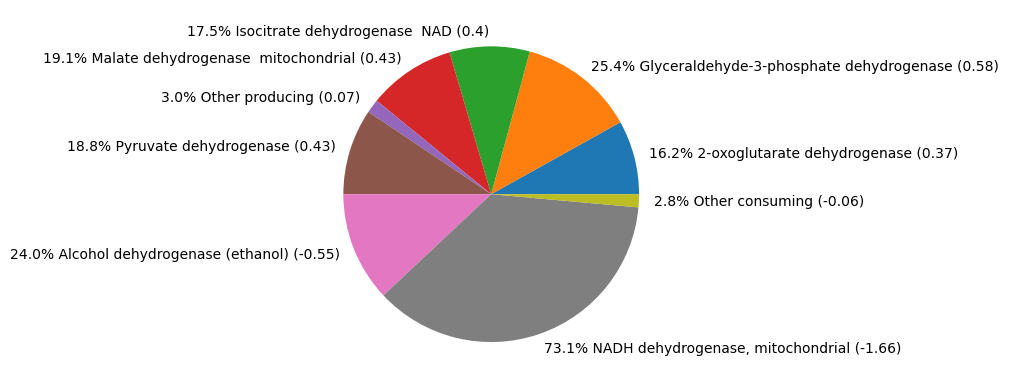

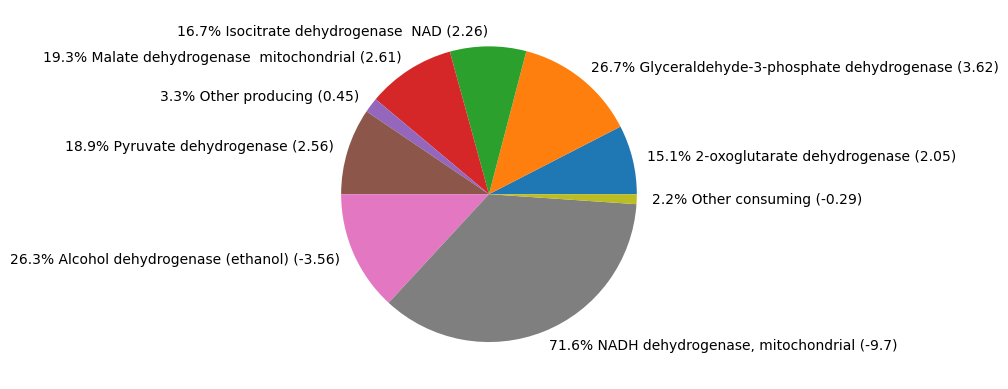

In [51]:
nadh_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 8.054412680127125, SUM consumed: -8.05441268012713
SUM produced: 47.5326351828699, SUM consumed: -47.53263518286992


([<matplotlib.patches.Wedge at 0x1ecabb30470>,
 [Text(0.37257435483966383, 1.034982294590496, '78.0% ATP synthase  mitochondrial (37.08)'),
  Text(-0.9188003475470047, 0.604818916162105, '6.9% Other producing (3.3)'),
  Text(-1.0319814360870447, 0.3808074520958344, '7.6% Phosphoglycerate kinase (3.62)'),
  Text(-1.0924953654400997, 0.12827266463242637, '7.4% Pyruvate kinase (3.54)'),
  Text(-1.0954363750350593, -0.10009569546213827, '5.8% Adenylate kinase (-2.76)'),
  Text(-0.34220753323895875, -1.0454157087945957, '68.3% Biomass (-32.45)'),
  Text(0.8324062261471076, -0.7190965683908737, '6.5% Hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.049223251306388, -0.33034916212706306, '19.4% Other consuming (-9.23)')])

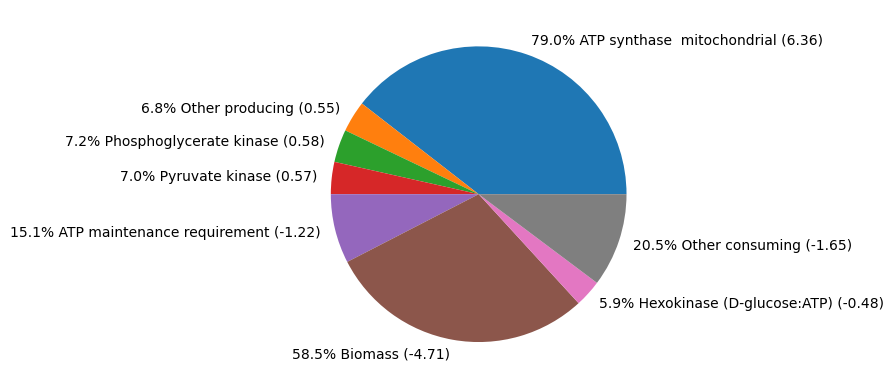

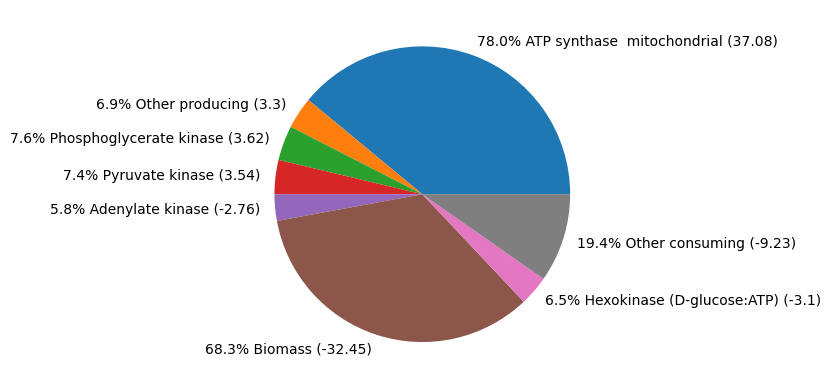

In [52]:
atp_fluxes_0 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_bm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [10]:
# import pickle

# with open("../cofactor_comparison/IFO0880_cofactors.pk", "wb") as f:
#     pickle.dump([nadph_fluxes_lowest_GR, nadph_fluxes_highest_GR, nadh_fluxes_lowest_GR, nadh_fluxes_highest_GR, atp_fluxes_lowest_GR, atp_fluxes_highest_GR], f)

In [ ]:
# # Get all fluxes to excel

# #  Get all flux values separately for dif growth rates, make them to a csv file

### NGAM minimisation

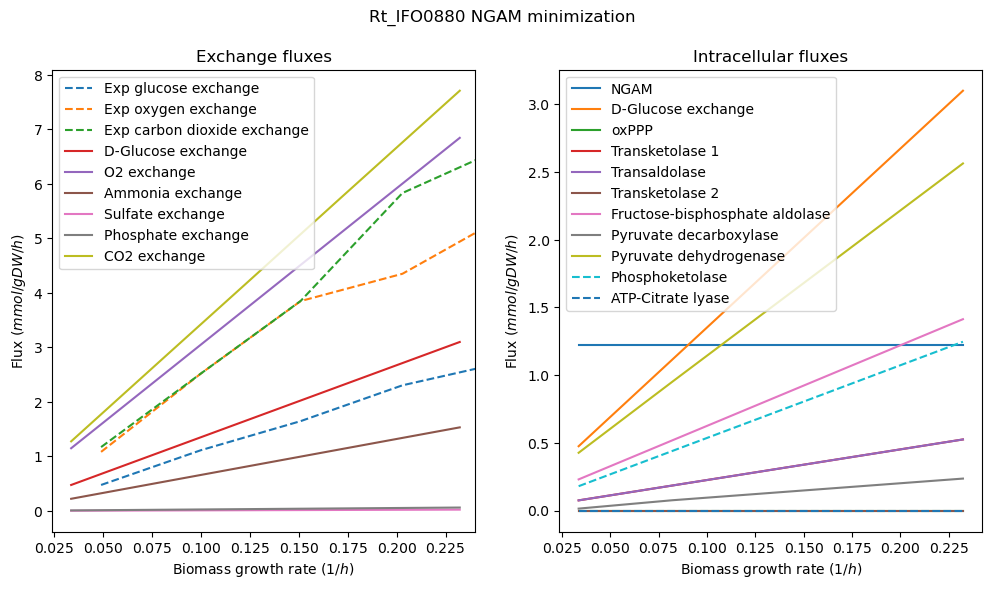

In [4]:
NGAM_rxn_ID = "ATPM"

ngam_IFO_all_fluxes = f.all_fluxes_NGAM_min_df(model_path, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID)

# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, ngam_IFO_all_fluxes, exchange_metabolites)

intracellular_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, ngam_IFO_all_fluxes, intracellular_metabolites)

phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, ngam_IFO_all_fluxes, ['XPK', 'ACITL'])

title = 'Rt_IFO0880 NGAM minimization'
fig = f.plot_ex_intr_fluxes(ngam_IFO_all_fluxes, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_NGAM_min.png")


COFACTOR balances

SUM produced: 0.6029542758833328, SUM consumed: -0.6029542758833328
SUM produced: 3.97470780530002, SUM consumed: -3.974707805300021


([<matplotlib.patches.Wedge at 0x1eccbeb07a0>,
 [Text(0.17996946654908996, 1.085177861509364, '89.5% Alcohol dehydrogenase (ethanol, NADP) (3.56)'),
  Text(-1.06977481081246, 0.25608954322885846, '6.0% Aldehyde dehydrogenase  acetylaldehyde  NADP   mitochondrial (0.24)'),
  Text(-1.09725840542986, 0.07761437826537713, '4.5% Other producing (0.18)'),
  Text(-1.0921945634587151, -0.13080915698538315, '7.6% Fatty acyl CoA synthase  n C80CoA   lumped reaction (-0.3)'),
  Text(-0.7827581979078803, -0.7728451355918649, '34.4% Glutamate dehydrogenase (NADP) (-1.37)'),
  Text(-0.09694998791924982, -1.095719261418023, '10.4% Hydroxymethylglutaryl CoA reductase (-0.41)'),
  Text(0.19610728249082976, -1.0823779070888606, '6.7% Methylenetetrahydrofolate dehydrogenase (NADP) (-0.26)'),
  Text(0.8800129965480401, -0.6599826709138197, '41.0% Other consuming (-1.63)')])

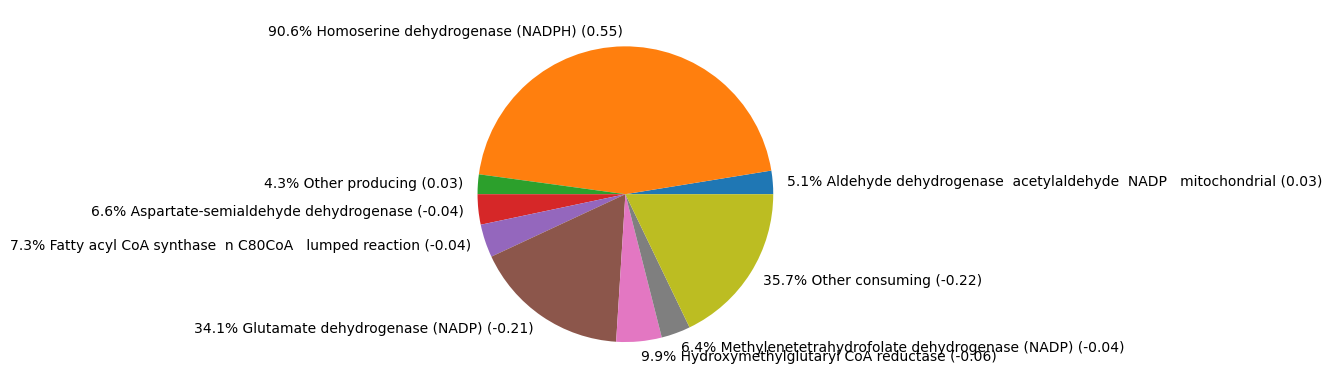

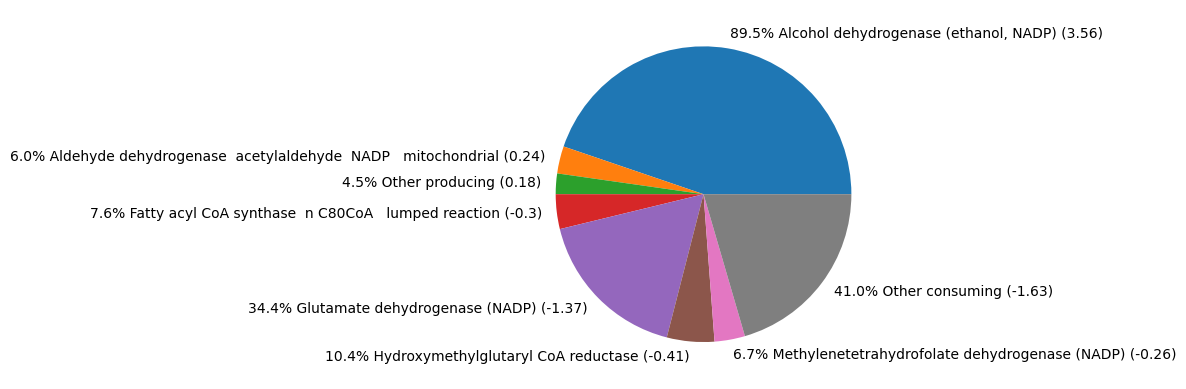

In [66]:
NGAM_rxn_ID = 'ATPM'
nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADPH.png")

nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADPH_max.png")

pie_nadph_fluxes_0
pie_nadph_fluxes_4

SUM produced: 2.5936686400000375, SUM consumed: -2.593668640000037
SUM produced: 13.76776471555897, SUM consumed: -13.76776471555897


([<matplotlib.patches.Wedge at 0x1ecab5dca10>,
 [Text(1.0686167005748541, 0.26087994796939223, '15.2% 2-oxoglutarate dehydrogenase (2.1)'),
  Text(0.6879043659032735, 0.8583633166504818, '26.5% Glyceraldehyde-3-phosphate dehydrogenase (3.65)'),
  Text(-0.0040758232232847025, 1.0999924489127426, '16.7% Isocitrate dehydrogenase  NAD (2.31)'),
  Text(-0.5932958682636589, 0.9262829010087962, '19.3% Malate dehydrogenase  mitochondrial (2.66)'),
  Text(-0.8778754088599583, 0.6628233297938156, '3.3% Other producing (0.45)'),
  Text(-1.051635314133142, 0.32258822989701263, '18.9% Pyruvate dehydrogenase (2.61)'),
  Text(-1.010285262593566, -0.4351134199105443, '25.9% Alcohol dehydrogenase (ethanol) (-3.56)'),
  Text(0.3992365416953318, -1.0249927725477639, '71.9% NADH dehydrogenase, mitochondrial (-9.89)'),
  Text(1.0993166098886515, -0.0387684307513506, '2.2% Other consuming (-0.31)')])

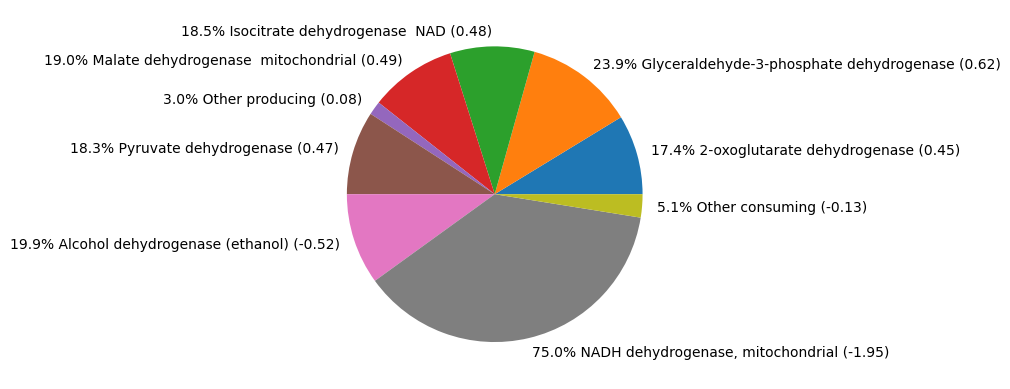

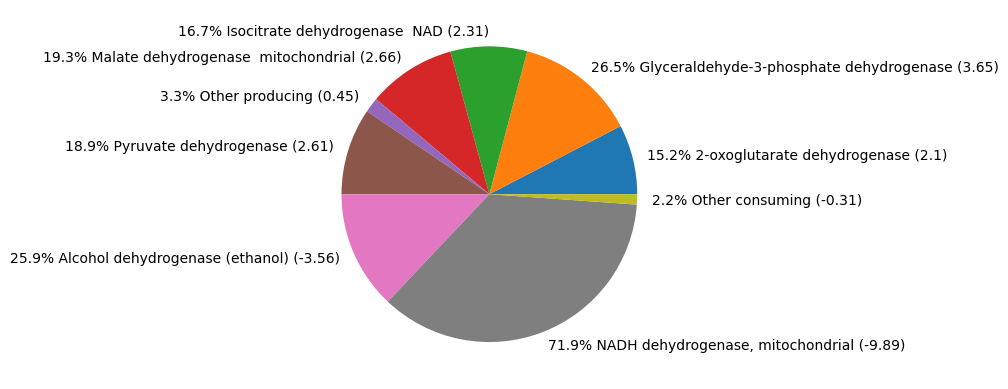

In [62]:
nadh_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 9.391545076666844, SUM consumed: -9.39154507666684
SUM produced: 48.38333839594222, SUM consumed: -48.3833383959422


([<matplotlib.patches.Wedge at 0x1ecabb30a40>,
 [Text(0.3692946835935126, 1.036157052125578, '78.2% ATP synthase  mitochondrial (37.84)'),
  Text(-0.9222131156657243, 0.5996023426356152, '6.9% Other producing (3.33)'),
  Text(-1.0333875216729593, 0.37697510534598866, '7.5% Phosphoglycerate kinase (3.65)'),
  Text(-1.0926499133707823, 0.12694946557911183, '7.4% Pyruvate kinase (3.56)'),
  Text(-1.0956808454035247, -0.09738318651501175, '5.6% Adenylate kinase (-2.73)'),
  Text(-1.0641733669410256, -0.27845115387335295, '5.0% ATP maintenance requirement (-2.42)'),
  Text(-0.21117400978510487, -1.0795395025617547, '66.4% Biomass (-32.13)'),
  Text(0.8951006626753814, -0.6393706309161324, '6.4% Hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.0630833142378604, -0.2825842652892169, '16.5% Other consuming (-8.0)')])

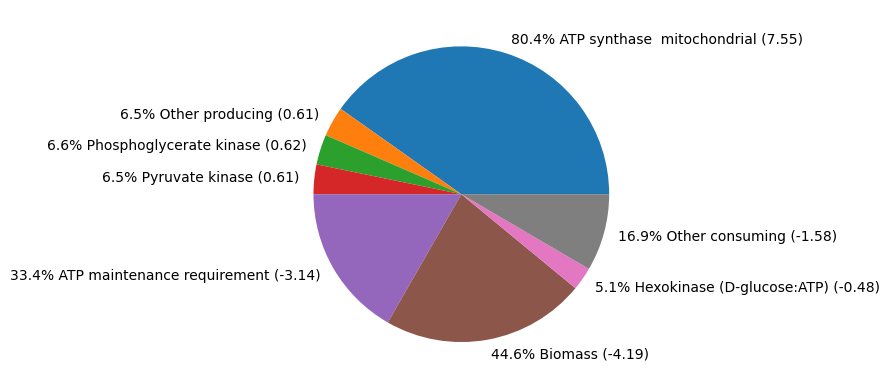

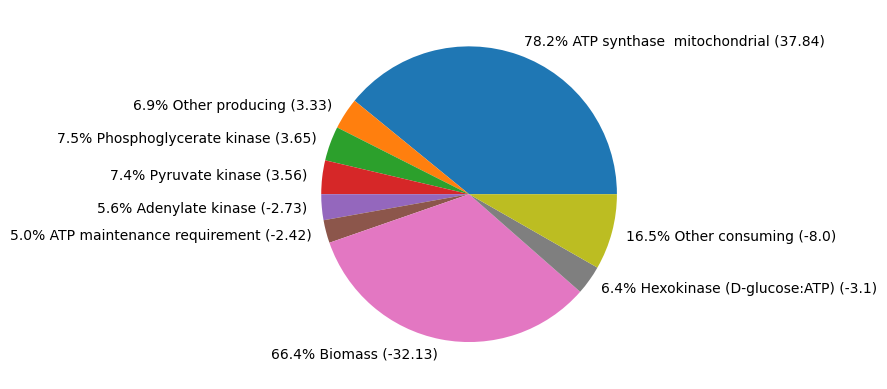

In [63]:
atp_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4, figsize=(13, 6))
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\IFO0880_nm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [ ]:
# All NGAM min fluxes to excel

# path = 
# f.all_fluxes_to_excel(path, ngam_IFO_all_fluxes)